In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

C:\Users\hany_\anaconda3\envs\dev\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hany_\anaconda3\envs\dev\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\hany_\anaconda3\envs\dev\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)

Bad key savefig.frameon in file C:\Users\hany_\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\hany_\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably

# Return Forecasting: Read Historical Daily Yen Futures Data
In this notebook, you will load historical Dollar-Yen exchange rate futures data and apply time series analysis and modeling to determine whether there is any predictable behavior.

In [2]:
# Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.index = pd.to_datetime(yen_futures.index, format="%Y-%m-%d")
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [3]:

# Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc["1989-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1989-01-03,8160.0,8187.0,8141.0,8149.0,NaN,8149.0,33969.0,31908.0
1989-01-04,8090.0,8098.0,8059.0,8085.0,NaN,8085.0,32081.0,30342.0
1989-01-05,8055.0,8056.0,8003.0,8009.0,NaN,8009.0,33147.0,30454.0
1989-01-06,7977.0,7992.0,7950.0,7967.0,NaN,7967.0,29530.0,33751.0
1989-01-09,7970.0,8021.0,7961.0,8018.0,NaN,8018.0,26426.0,33066.0


 # Return Forecasting: Initial Time-Series Plotting

 Start by plotting the "Settle" price. Do you see any patterns, long-term and/or short?

<AxesSubplot:xlabel='Date'>

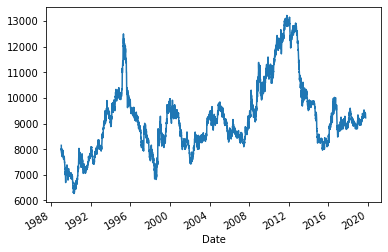

In [4]:
# Plot just the "Settle" column from the dataframe:
# YOUR CODE HERE!
yen_futures['Settle'].plot()

---

# Decomposition Using a Hodrick-Prescott Filter

 Using a Hodrick-Prescott Filter, decompose the Settle price into a trend and noise.

In [5]:
#import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the "Settle" price into two separate series:
# YOUR CODE HERE!
import statsmodels.api as sm
yen_noise, yen_trend = sm.tsa.filters.hpfilter(yen_futures['Settle'])

In [6]:
# Create a dataframe of just the settle price, and add columns for "noise" and "trend" series from above:
# YOUR CODE HERE!
yen_df = yen_futures.drop(columns=['Open','High','Low','Last','Change','Volume','Previous Day Open Interest'])
yen_df['Noise'] = yen_noise
yen_df['Trend'] = yen_trend
yen_df.head()

,Settle,Noise,Trend
Date,,,
1989-01-03,8149.0,88.552449,8060.447551
1989-01-04,8085.0,41.276819,8043.723181
1989-01-05,8009.0,-18.054156,8027.054156
1989-01-06,7967.0,-43.521621,8010.521621
1989-01-09,8018.0,23.804567,7994.195433


<AxesSubplot:xlabel='Date'>

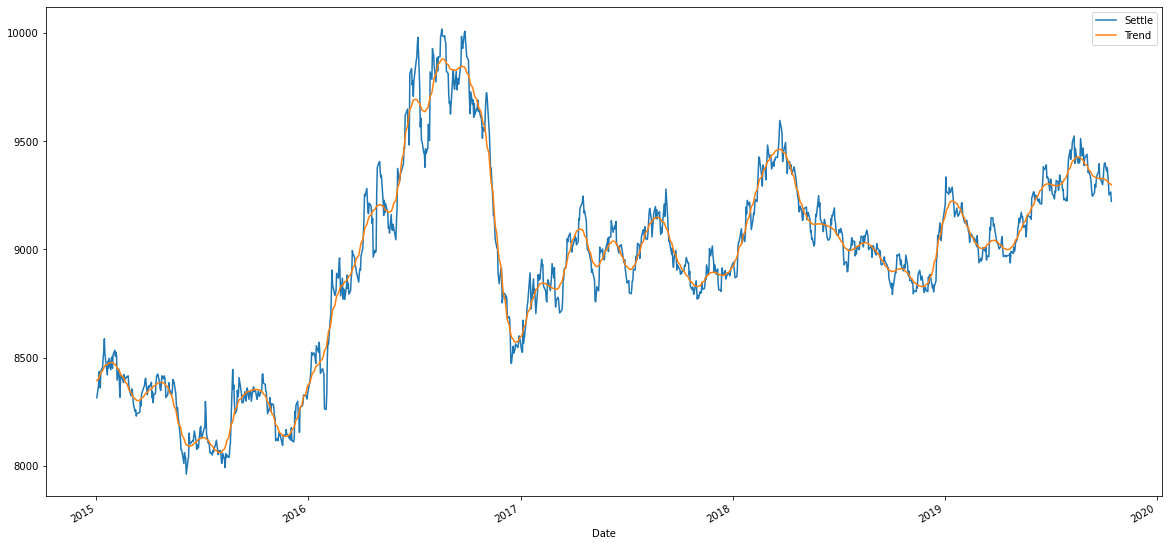

In [7]:
# Plot the Settle Price vs. the Trend for 2015 to the present
# YOUR CODE HERE!
yen_df[['Settle','Trend']].loc['2015-01-01':,:].plot(figsize=[20,10])


<AxesSubplot:xlabel='Date'>

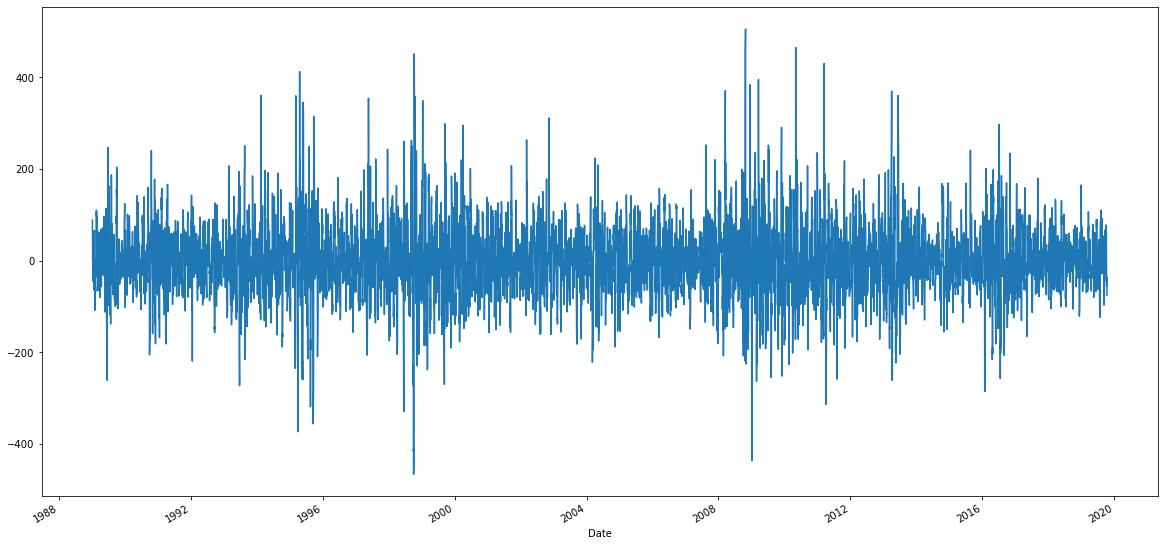

In [8]:
# Plot the Settle Noise
# YOUR CODE HERE!
yen_df['Noise'].plot(figsize=[20,10])

---

# Forecasting Returns using an ARMA Model

Using futures Settle *Returns*, estimate an ARMA model

1. ARMA: Create an ARMA model and fit it to the returns data. Note: Set the AR and MA ("p" and "q") parameters to p=2 and q=1: order=(2, 1).
2. Output the ARMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the forecasted returns (the results forecast from ARMA model)

In [9]:
yen_df = yen_futures.drop(columns=['Open','High','Low','Last','Change','Volume','Previous Day Open Interest'])
yen_df['Noise'] = yen_noise
yen_df['Trend'] = yen_trend
yen_df.head()

,Settle,Noise,Trend
Date,,,
1989-01-03,8149.0,88.552449,8060.447551
1989-01-04,8085.0,41.276819,8043.723181
1989-01-05,8009.0,-18.054156,8027.054156
1989-01-06,7967.0,-43.521621,8010.521621
1989-01-09,8018.0,23.804567,7994.195433


In [10]:
from statsmodels.tsa.arima.model import ARIMA

# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
# YOUR CODE HERE!
model = ARIMA(yen_futures['Settle'], order=(5, 1, 1))
# Fit the model
# YOUR CODE HERE!
arima_results = model.fit()

C:\Users\hany_\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hany_\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hany_\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [11]:
# Output model summary results:
# YOUR CODE HERE!
arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Settle   No. Observations:                 7767
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -43308.842
Date:                Wed, 25 Aug 2021   AIC                          86631.684
Time:                        13:00:24   BIC                          86680.387
Sample:                             0   HQIC                         86648.379
                               - 7767                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0065      2.062     -0.003      0.997      -4.048       4.035
ar.L2         -0.0033      0.029     -0.117      0.907      -0.059       0.053
ar.L3         -0.0125      0.012     -1.051      0.293      -0.036       0.011
ar.L4         -0.0189      0.028     -0.678      0.498      -0.074       0.036
ar.L5         -0.0042      0.040     -0.104      0.917      -0.082       0.074
ma.L1         -0.0067      2.062     -0.003      0.997      -4.048       4.035
sigma2      4088.2082     32.566    125.537      0.000    4024.380    4152.036
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             13984.43
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\hany_\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


<AxesSubplot:title={'center':'Yen Settle Price Forecast'}>

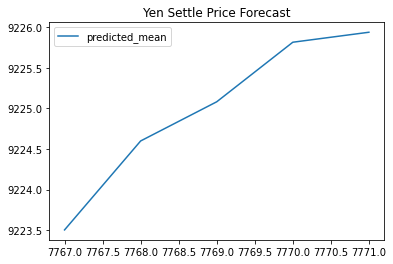

In [12]:
# Plot the 5 Day Returns Forecast
# YOUR CODE HERE!
pd.DataFrame(arima_results.forecast(steps=5)).plot(title="Yen Settle Price Forecast")

---

# Forecasting the Settle Price using an ARIMA Model

 1. Using the *raw* Yen **Settle Price**, estimate an ARIMA model.
     1. Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))
     2. P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags
 2. Output the ARIMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
 3. Construct a 5 day forecast for the Settle Price. What does the model forecast will happen to the Japanese Yen in the near term?

In [13]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (yen_futures[["Settle"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Settle
Date,
2019-10-09,-0.410601
2019-10-10,-0.369458
2019-10-11,-0.564304
2019-10-14,0.151335
2019-10-15,-0.469509


In [14]:
from statsmodels.tsa.arima.model import ARIMA

# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
# YOUR CODE HERE!
model = ARIMA(yen_futures['Settle'], order=(5, 1, 1))
# Fit the model
# YOUR CODE HERE!
arima_results = model.fit()

C:\Users\hany_\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hany_\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hany_\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [15]:
# Output model summary results:
arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Settle   No. Observations:                 7767
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -43308.842
Date:                Wed, 25 Aug 2021   AIC                          86631.684
Time:                        13:00:25   BIC                          86680.387
Sample:                             0   HQIC                         86648.379
                               - 7767                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0065      2.062     -0.003      0.997      -4.048       4.035
ar.L2         -0.0033      0.029     -0.117      0.907      -0.059       0.053
ar.L3         -0.0125      0.012     -1.051      0.293      -0.036       0.011
ar.L4         -0.0189      0.028     -0.678      0.498      -0.074       0.036
ar.L5         -0.0042      0.040     -0.104      0.917      -0.082       0.074
ma.L1         -0.0067      2.062     -0.003      0.997      -4.048       4.035
sigma2      4088.2082     32.566    125.537      0.000    4024.380    4152.036
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             13984.43
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\hany_\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


<AxesSubplot:title={'center':'Yen Settle Price Forecast'}>

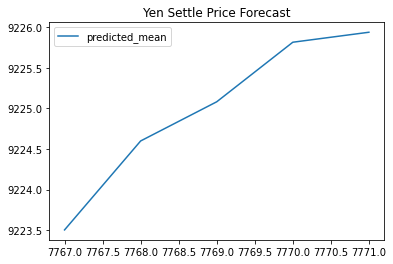

In [16]:
# Plot the 5 Day Price Forecast
# YOUR CODE HERE!
pd.DataFrame(arima_results.forecast(steps=5)).plot(title="Yen Settle Price Forecast")

---

# Volatility Forecasting with GARCH

Rather than predicting returns, let's forecast near-term **volatility** of Japanese Yen futures returns. Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.
 
Using futures Settle *Returns*, estimate an GARCH model

1. GARCH: Create an GARCH model and fit it to the returns data. Note: Set the parameters to p=2 and q=1: order=(2, 1).
2. Output the GARCH summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the volatility.

In [17]:
from arch import arch_model

In [18]:
# Estimate a GARCH model:
# YOUR CODE HERE!
model = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1)
# Fit the model
# YOUR CODE HERE!
res = model.fit(disp="off")

In [19]:
# Summarize the model results
# YOUR CODE HERE!
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Settle   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7729.60
Distribution:                  Normal   AIC:                           15467.2
Method:            Maximum Likelihood   BIC:                           15495.0
                                        No. Observations:                 7766
Date:                Wed, Aug 25 2021   Df Residuals:                     7766
Time:                        13:00:25   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      4.9325e-03  2.377e-03      2.075  3.795e-02  [2.743e-04,9.591e-03]
alpha[1]       0.0409  1.341e-02      3.047  2.313e-03  [1.457e-02,6.714e-02]
alpha[2]       0.0000  1.810e-02      0.000      1.000 [-3.548e-02,3.548e-02]
beta[1]        0.9496  1.572e-02     60.417      0.000      [  0.919,  0.980]
=============================================================================

Covariance estimator: robust
"""

In [20]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2019-10-15'

In [21]:
# Create a 5 day forecast of volatility
forecast_horizon = 5
# Start the forecast using the last_day calculated above
# YOUR CODE HERE!
forecasts = res.forecast(start=last_day, horizon=forecast_horizon, reindex=True)

In [22]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2019-10-15,7.467442,7.514984,7.561779,7.607844,7.653199


In [23]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2019-10-15
h.1,7.467442
h.2,7.514984
h.3,7.561779
h.4,7.607844
h.5,7.653199


<AxesSubplot:>

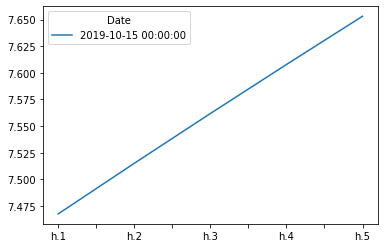

In [24]:
# Plot the final forecast
# YOUR CODE HERE!
final.plot()

---

# Conclusions

Based on your time series analysis, would you buy the yen now?

Is the risk of the yen expected to increase or decrease?

Based on the model evaluation, would you feel confident in using these models for trading?